<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

In [2]:
!nrnivmodl 

/home/In Silico Neuroscience/h8 - Synapses/Homework_week8
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
"/usr/local/nrn/x86_64/bin/nocmodl" TsodyksMarkram_AMPA_NMDA
"/usr/local/nrn/x86_64/bin/nocmodl" vecevent
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
Translating TsodyksMarkram_AMPA_NMDA.mod into TsodyksMarkram_AMPA_NMDA.c
Translating vecevent.mod into vecevent.c
Notice: Use of POINTER is not thread safe.
Notice: VERBATIM blocks are not thread safe
Notice: ARTIFICIAL_CELL is a synonym for POINT_PROCESS which hints that it
only affects and is affected by discrete events. As such it is not
located in a section and is not associated with an integrator
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c m

In [1]:
import neuron
from neuron import h
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load external files & initialize
h.load_file("stdrun.hoc");
h.stdinit();

## Ex1. Plot the dependence of the NMDA conductance on Mg<sup>2+</sup>.

<font sie='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the peak synaptic conductances used in tutorial 01, plot the NMDA conductance after removing the magnesium block, without changing the Mg<sup>2+</sup> concentration. Show how the NMDA conductance changes as the magnesium block is gradually removed.
    
<font sie='3'>Explain what happens to the NMDA conductance and why, in a mechanistic sense, does this happen. What could be the functional purpose of this behavior? [1.5 pts]

#### Response: 

In [2]:
# create neuron + biophysics properties
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1
    
# create synapse on the soma
synapse = h.SimpleAMPA_NMDA(soma(0.5))

synapse.gmax_AMPA = 0.001 # uS
synapse.gmax_NMDA = 0.7 * 0.001 # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance

In [3]:
# define stimulation: 8 spikes at 20Hz + 1 spike 500 ms later
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

# Create a recorder for the time intervals and NMDA conductance
time = h.Vector()
time.record(neuron.h._ref_t)
g_NMDA = h.Vector()
g_NMDA.record(synapse._ref_g_NMDA)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)

Vector[4]

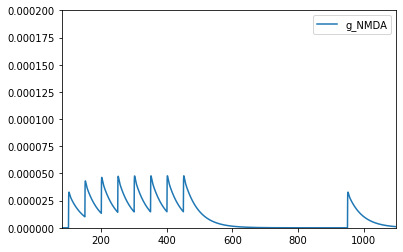

In [4]:
synapse.mg = 1.0 # mM
h.tstop = 1100.0 # ms
h.run()

plt.figure()
plt.plot(time, g_NMDA, label= 'g_NMDA')
plt.axis([80.0, 1100.0, 0.0, 0.0002])
plt.legend()

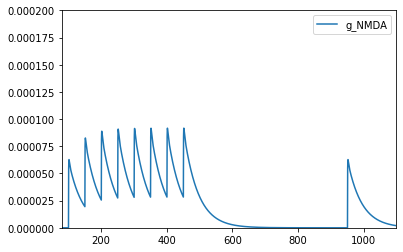

In [5]:
synapse.mg = 0.5 # mM
h.tstop = 1100.0 # ms
h.run()

plt.figure()
plt.plot(time, g_NMDA, label= 'g_NMDA')
plt.axis([80.0, 1100.0, 0.0, 0.0002])
plt.legend()

We fix the Mg2+ concentration. At resting membrane potential the magnesium blocks all the NMDA channels. The initial depolarization will release some magnesium blocks, opening the NMDA channels and increasing the conductance. If the second spike arrives shortly after the first depolarization, the new depolarization will release more magnesium blocks, increasing the conductance with respect to the first spike. For the last spike, the channels have re-taken the magnesium block and therefore, the conductance achieved is the same as for the first spike.

The smaller the magnesium concentration, the faster the magnesium block will be removed when the stimulus come and, therefore, the higher the conductance.

## Ex2. Configure a pseudolinear synapse (E3)

<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Find the values for U1, tau_rec and tau_facil that would make the synapse behave as a pseudolinear synapse and plot the R, Use and conductance curves.
    
<font size='3'>Define U1, tau_rec and tau_facil. Would you be able to define any relation between these variables depending on the synapse type? If yes, please explain. [1.5 pts]    

#### Response: 

In [6]:
# create soma
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')

# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1
    
# synapse:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))
synapse.gmax_AMPA = 0.002 # uS
synapse.gmax_NMDA = 0.7 * 0.002 # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0 # mM

In [7]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[9]

In [8]:
synapse.U1 = 0.3 # Baseline release probability
synapse.tau_rec = 300 # ms - recovery from depression
synapse.tau_facil = 300 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

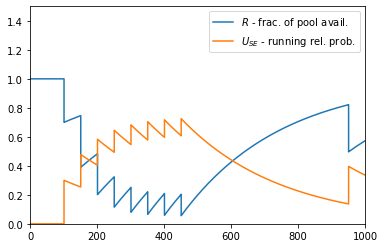

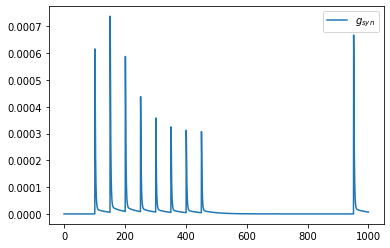

In [9]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

U_1: baseline fraction of synaptic resources used by a single spike (baseline release probability)

tau_rec: how long it takes until the synapse is as strong as before the first AP arrived. Time it takes to recover all initial resources after depression.

tau_facil: relaxation time of facilitation, how long until the next synapse recovers the baseline release probability.

In a facilitating synapse, tau_rec and U_1 present a smaller value than for the depressing synapse, while tau_facil will be larger. In the facilitating synapse, this will lead to a smaller amout of resources released at the beginning and a fast time to recover the resources used, what will lead to an increasing release every action potential, increasing its conductance. On the other hand, for the depressing there will be a high release of resources after the first AP. The following APs will have a reduced amount of resources available, decreasing the conductance for the following APs. The pseudo-linear case is an intermediary case.

# Ex 3. Ornstein-Uhlenbeck Process

<font size='3'> Based on the data from one of connections in your group folder (.h5 files), calculate the parameters reuqired for an Ornstein-Uhlenbeck process, and plot their distributions as shown in [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928). Note that you don't need to plot the smoothed histogram overlay shown in the paper [1.5 pts]


In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

#### Loading and visualizing the data

<KeysViewHDF5 ['v0', 'v1', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v2', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']>


Text(0, 0.5, 'voltage, mV')

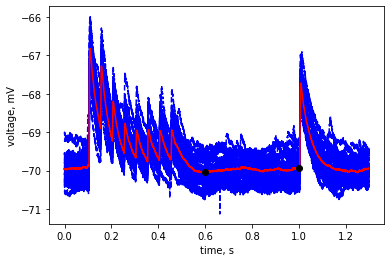

In [27]:
data = h5py.File('Group8/connection_c60.h5', 'r')

STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
time = np.arange(0,1.3,0.0001)

print(data.keys())

connection_array = []
for v in data.keys():
    dat = data.get(v)
    dat = np.array(dat)
    connection_array.append(dat)

mean_trace =np.mean(connection_array, axis = 0)
time = np.arange(0,1.3,0.0001)

plt.figure()
for rep in connection_array:
    plt.plot(time, rep*1000, 'b--')
plt.plot(time, mean_trace*1000, 'r')
plt.plot(time[STIM_TIMES[7]+1500], 1000*mean_trace[STIM_TIMES[7]+1500], 'ko')
plt.plot(time[STIM_TIMES[8]], 1000*mean_trace[STIM_TIMES[8]], 'ko')
plt.xlabel('time, s')
plt.ylabel('voltage, mV')

### Computing sigma

In [12]:
def get_data(file_name):
    data = h5py.File(file_name, 'r')
    connection_array = []
    for v in data.keys():
        dat = data.get(v)
        dat = np.array(dat)
        connection_array.append(dat)
        
    return connection_array

def compute_sigma(file_name, STIM_TIMES, t_wind_bef, t_wind_aft):
    """
    This function compute the standard deviation of the voltage in the traces
    :param traces: traces
    :param STIM_TIMES: times where a stimulus is performed
    :param t_wind_bef: time window before the stimulus
    :param t_wind_aft: time window after the stimulus 
    :return amplitudes: list with amplitude values
    """
    traces = get_data(file_name)
    stds = []
    max_list = []
    min_list = []
    for trace in traces:
        # as in the paper, we take the voltages between the 8th and 9th EPSPs
        # multiply by 1000 to have mV
        
        # if we consider time window before and after -->
        std = np.std(trace[(STIM_TIMES[7]+ t_wind_aft):(STIM_TIMES[8]-t_wind_bef)]*1000)   
        stds.append(std)
    return stds

Text(0, 0.5, '# of repetitions')

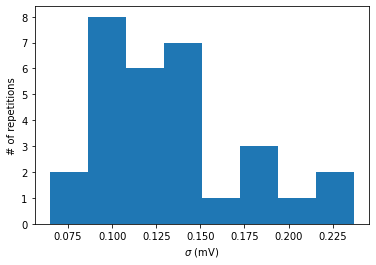

In [20]:
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
t_wind_aft = 1500 #  to start after the last spike
t_wind_bef = 0
time = np.arange(0,1.3,0.0001)

file = 'Group8/connection_c60.h5'

sigmas = compute_sigma(file, STIM_TIMES, t_wind_bef, t_wind_aft)

plt.hist(sigmas, bins=8)
plt.xlabel(r'$\sigma$ (mV)')
plt.ylabel('# of repetitions')

### Compute tau

In [21]:
from scipy.optimize import curve_fit

def func_exp(x, tau):
    return np.exp(-x/tau)

def compute_fitting(x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data)
    return popt[0] # it returns tau

def compute_tau(file_name, STIM_TIMES, t_wind_bef, t_wind_aft):
    """
    This function compute the standard deviation of the voltage in the traces
    :param traces: traces
    :param STIM_TIMES: times where a stimulus is performed
    :param t_wind_bef: time window before the stimulus
    :param t_wind_aft: time window after the stimulus 
    :return amplitudes: list with amplitude values
    """
    traces = get_data(file_name)
    correlations = []
    taus = []
    for trace in traces:
        # as in the paper, we take the voltages between the 8th and 9th EPSPs
        x = trace[(STIM_TIMES[7]+ t_wind_aft):(STIM_TIMES[8]-t_wind_bef)]*1000  
        
        # compute autocorrelation
        corr = acf(x, nlags=len(x), fft=False)
        correlations.append(corr)
        
        # set time to ms
        t = np.arange(0, len(x))*0.1
        
        # fit to an exponential to obtain tau
        tau = compute_fitting(t, corr)
        
        taus.append(tau)
    return taus, correlations

Text(0, 0.5, '# of repetitions')

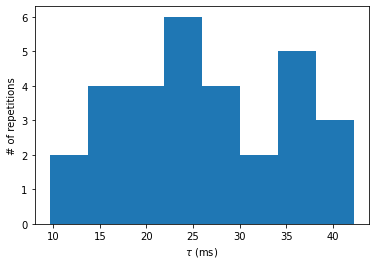

In [23]:
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
t_wind_aft = 1500
t_wind_bef = 0

file = 'Group8/connection_c60.h5'

taus, correlations = compute_tau(file, STIM_TIMES, t_wind_bef, t_wind_aft)
plt.hist(taus, bins=8)
plt.xlabel(r'$\tau$ (ms)')
plt.ylabel('# of repetitions')

We follow the same steps as in [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928) to compute the parameters that define the Ornstein-Uhlenbeck process: σ and τ.

As in the paper, we defined σ and τ using the voltage values between the 8th and the 9th EPSPs, for each repetition (sweep) in a connection. By computing the standard deviation of these points, we obtained one σ per repetition. By computing the autocorrelation of this part of the voltage trace and fitting it to an exponential, we obtained one τ per repetition. [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928) then averaged the resulting values for each connection. In our plots, we present the histogram of the values for each repetition within the same connection. We can see how the range of our results values are similar to the ones obtained in the paper.

# Ex 4. Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Plot the mean failure rate for each of the three connections, as a function of the thresholds used in the definition of a failure. What does this tell you about your three different connections? [1.5 pts]

In [63]:
def amp_rise_lat_firstEPSP(sample_connection, STIM_TIMES, time, t_wind_bef, t_wind_aft, PLOT = False):
    """
    This function selects the rise curve (first EPSP) and find the  5, 20 and 80 % of the amplitude.
    Firstly computes the amplitude as the difference minimum - maximum in the interval (first_stimulus, max_peak).
    Secondly computes the percentages and find the times for these respective values.
    Tau_rise = 80%_time - 20%_time (Feldmeyer et al., 1999)
    latency = 5%_time - first_stimulus
    :param sample_connection: array with voltage traces oriented (voltage vs trials)(row vs column)
    :param STIM_TIMES: list with the stimuli points
    :param time: list with time steps in s
    :param t_wind_aft: time window after the stim time to compute max and min
    :param t_wind_bef: time window before the stim time to compute max and min
    :return amp_value: amplitude of the first EPSP computed as the difference between the 20 and the 80 % of rise
    :return TAU_rise: list with tau_rise values in ms. Computed as the distance between the times when
    the 20 and 80 % of the rise part for the first EPSP happens
    :return latency: list with latency values in ms. Computed as the time between the AP of the presynaptic cell
    and the 5% of the first EPSP
    """
    # The analysis are performed over the mean trace
    conn = sample_connection

    # save only the trace part for the first peak for voltage and time
    rise_curve = conn[STIM_TIMES[0] - t_wind_bef:STIM_TIMES[0] + t_wind_aft]
    rise_curve_time = time[STIM_TIMES[0] - t_wind_bef:STIM_TIMES[0] + t_wind_aft]

    # find max, min and compute amplitude
    max_value = np.max(rise_curve)
    min_value = np.min(rise_curve)
    amp_value_total = np.abs(max_value - min_value)

    # compute percentages
    twenty_peak_value = amp_value_total * 80.0 / 100.0
    eighty_peak_value = amp_value_total * 20.0 / 100.0
    five_peak_value = amp_value_total * 95.0 / 100.0
    amp_value = eighty_peak_value - twenty_peak_value

    # Find the exact voltage point
    twenty_curve_value = -(twenty_peak_value - max_value)
    eighty_curve_value = -(eighty_peak_value - max_value)
    five_curve_value = -(five_peak_value - max_value)

    # Find time point for the minimum
    for x, s in zip(rise_curve, rise_curve_time):
        if (x == min_value):
            min_time = s

    # Find time points for the 5, 20 and 80 % of the first EPSP
    n = 0
    m = 0
    l = 0
    for i, j in zip(rise_curve, rise_curve_time):
        if (n == 0) and (i > twenty_curve_value) and (j > min_time):
            twenty_time = j
            n = 1
        if (m == 0) and (i > eighty_curve_value) and (j > min_time):
            eighty_time = j
            m = 1
        if (l == 0) and (i > five_curve_value) and (j > min_time):
            five_time = j
            l = 1
    
    pre_AP = time[STIM_TIMES[0]]
    TAU_rise = np.abs((twenty_time-eighty_time))
    latency = np.abs((five_time)-pre_AP)

    # PLOT first EPSP with the computed points for the 5, 20 and 80 % of the first EPSP
    if PLOT == True:
        plt.figure()
        plt.plot(rise_curve_time, rise_curve, label='first EPSP')
        plt.plot(twenty_time, twenty_curve_value, 'ro', label='20%')
        plt.plot(eighty_time, eighty_curve_value, 'mo', label='80%')
        plt.plot(five_time, five_curve_value, 'go', label='5%')
        plt.legend()
        plt.show()

    return amp_value, TAU_rise, latency

In [64]:
# times where a stimulus is performed
STIM_TIMES = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000]
t_wind_aft = 300
t_wind_bef = 50
time = np.arange(0,1.3,0.0001)

def first_approach(file_name):
    connections = get_data(file_name)
    mean_con = np.mean(connections, axis = 0)


    amp_value, TAU_rise, mean_latency = amp_rise_lat_firstEPSP(mean_con, STIM_TIMES, time, t_wind_bef, t_wind_aft, PLOT = False)

    thresholds = np.arange(0.5, 5.5, 0.5)

    fs_1s = []
    fs_2s = []

    for thrs in thresholds:
        failures_1 = 0
        latencies = []
        # comparing to latency of the mean connection
        for rep in connections:
            _, _, latency = amp_rise_lat_firstEPSP(rep, STIM_TIMES, time, t_wind_bef, t_wind_aft, PLOT = False)
            latencies.append(latency)
            if latency >= thrs *mean_latency:
                failures_1 += 1
        #print('Failures 1 ', failures_1)
        fs_1s.append(failures_1/len(latencies))

        # comparing to mean of the latencies
        failures_2 = 0
        m_lat = np.mean(latencies)
        for lat in latencies:
            if lat >= thrs *m_lat:
                failures_2 += 1
        #print('Failures 2 ', failures_2)
        fs_2s.append(failures_2/len(latencies))
    return thresholds, fs_1s, fs_2s

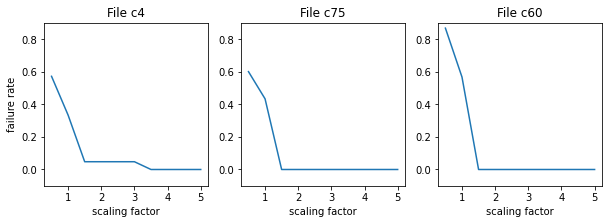

In [65]:
file_name = 'Group8/connection_c4.h5'
thresholds, fs_1s_a, fs_2s_a = first_approach(file_name)
file_name = 'Group8/connection_c75.h5'
thresholds, fs_1s_b, fs_2s_b = first_approach(file_name)
file_name = 'Group8/connection_c60.h5'
thresholds, fs_1s_c, fs_2s_c = first_approach(file_name)

fig, axs = plt.subplots(1, 3, figsize = (10, 3))
axs[0].plot(thresholds, fs_1s_a)
axs[1].plot(thresholds, fs_1s_b)
_ = axs[2].plot(thresholds, fs_1s_c)

file_number = ['c4', 'c75', 'c60']

for (i,ax) in enumerate(axs):
    ax.set_xlabel('scaling factor')
    ax.set_ylim([-0.1, 0.9])
    ax.set_title('File ' + file_number[i])
    
_ = axs[0].set_ylabel('failure rate')

The latency is defined as the interval between the peak of the presynaptic AP and the onset of the EPSP. If there is a long latency, a long time has passed since the AP initiation in the presynaptic cell which in turn means that it might have failed to generate the EPSP. As in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/), we consider that failures are defined as latencies larger than 2·5 × the mean latency.

For a small scaling factor, the connection 60 is the one with the highest failure rate. However, if we consider the scaling factor used in the paper (2.5), the connection 4 has one failure, but for the two other connections we find no failures.